# Week 13 Programming Assignment

The final thing for this semester that we haven't exercised, yet, is working with databases and combining data from multiple different sources.  In this last assignment of the semester before the final project, we'll be combining data from the internet, an existing database, and some local files on our Jupyter server.

**Please be careful to make sure that any code creating database tables has your username in the table name so that they don't conflict with other students.  The database is a shared environment.**

This example works with the hospital price transparency data that we've looked at in class from time to time.  For this work, we're going to compare data from two different facilities after it's been merged with another reference data set.

Follow the instructions below, writing and testing your code using the assert statements.  Then submit your assignment as usual.

## 1. Getting data from a relational database

In our database, there is a table called `fiverivers` that contains price transparency data for the St. Bernhard's Five Rivers hospital location.  Write code to retrieve that data from the database and load it to a Pandas dataframe.

I'll give you the code you need to connect to the database to make the first step easier.

In [22]:
import os
from sqlalchemy import create_engine
import pandas as pd

host = 'slucor2021b.cgdcoitnku0k.us-east-1.rds.amazonaws.com'
port = '3306'
user = 'slucor2020'
password = 'SLUcor2020'
database = 'hds5210'

conn = create_engine('mysql+pymysql://' + 
                     user + ':' + 
                     password + '@' + 
                     host + ':' + 
                     str(port) + '/' + 
                     database)

### 1.1

Now, write the code you need to select everything from the `fiverivers` table.  Query those results into a Pandas dataframe called `fiverivers_df`.

In [23]:
fiverivers = pd.read_sql('select * from fiverivers',conn)

### 1.2

Demonstrate what your `fiverivers` dataframe has been printing the first few rows to the page here.

In [24]:
fiverivers.head()

,source,hospital_system,hospital,hospital_npi,hospital_ein,medicare_facility_id,raw_plan,payer,payer_plan,item_id,...,item_description,rev_code,ms_drg,cpt_hcpcs,med_ndc,med_qty,med_units,setting,charged_amt,allowed_amt
0,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUE ADVANTAGE PPO,ABCBS,Blue Advantage PPO,162014722-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,197.52
1,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUE ADVANTAGE PPO,ABCBS,Blue Advantage PPO,162014722-90471,...,Administration Of Vaccine,None,None,90471,None,None,None,OP,163.38,197.52
2,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,UNITED HEALTHCARE MEDICARE ADVANTAGE,United Healthcare,Medicare Advantage,162014731-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,22.03
3,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,UNITED HEALTHCARE MEDICARE ADVANTAGE,United Healthcare,Medicare Advantage,162014731-90471,...,Administration Of Vaccine,None,None,90471,None,None,None,OP,163.38,22.03
4,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,CIGNA COMMERCIAL,Cigna,Commercial,162014727-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,56.68


### 1.3

How many total rows and columns does that database table have?

In [25]:
fiverivers.shape

(3376, 21)

### 1.4

How many rows does it have where the `payer` is `ABCBS`?

In [29]:
sum(fiverivers['payer'] == 'ABCBS')

529

## 2. Reading JSON data

We also want to get data for St. Bernards Medical Center, but that data is only in a JSON file format.  You can find it in your data directory or read it from `/data/sbmc_raw.json`.  Load that data using Pandas and answer the questions below.  You do not need to load this file into Pandas.

In [32]:
import json

with open('/data/sbmc_raw.json') as f:
    sbmc = json.load(f)

### 2.1

How many rows are there in this data?

In [31]:
len(sbmc)

3635

### 2.2

Take a peak at the first item in the JSON list.

In [33]:
sbmc[0]

{'id': 162045918,
 'keyStr_Associated_Codes': '\tG0008,G0009,90471',
 'num_Avg_Gross_Charge': 238.74,
 'num_Cash_Discount': 155.18,
 'num_DeIdentified_Max_Allowed': 348.23,
 'num_Deidentified_Min_Allowed': 17.48,
 'keyStr_description': 'Administration Of Vaccine',
 'keyStr_iobSelection': 'Outpatient',
 'str_nonperformed': '0',
 'str_payer': 'UNITED HEALTHCARE MEDICARE ADVANTAGE',
 'num_Payer_Allowed_Amount': 40.83,
 'num_payerId': '33'}

### 2.3

You'll notice a field called `str_payer`.  How many unique values are there in that field and what are they?

In [34]:
payers = set([x['str_payer'] for x in sbmc])

In [35]:
len(payers)

35

In [36]:
payers

{'ADMINISTRATIVE CONCEPTS PPO',
 'AETNA COMMERCIAL',
 'AETNA HMO',
 'AETNA MEDICARE ADVANTAGE',
 'AETNA PPO',
 'ALLEGIANCE BENEFIT PLAN MANAGEMENT COMMERCIAL',
 'ALLIED BENEFIT SYSTEM COMMERCIAL',
 'ALLWELL COMMERCIAL',
 'ALLWELL MANAGED MEDICAID',
 'ALLWELL MEDICARE ADVANTAGE',
 'AMBETTER COMMERCIAL',
 'AMBETTER MANAGED MEDICAID',
 'AMBETTER MEDICARE ADVANTAGE',
 'BENEFIT ADMINISTRATIVE SYSTEMS COMMERCIAL',
 'BENESYS, INC. COMMERCIAL',
 'BLUE ADVANTAGE PPO',
 'BLUECROSS BLUESHIELD COMMERCIAL',
 'BLUECROSS BLUESHIELD MEDICARE ADVANTAGE',
 'CIGNA COMMERCIAL',
 'CONNECTICUT GENERAL LIFE INSURANCE COMPANY COMMERCIAL',
 'HARMONY HEALTH PLAN MEDICARE ADVANTAGE',
 'HEALTH ADVANTAGE MEDICARE ADVANTAGE',
 'HUMANA MEDICARE ADVANTAGE',
 'MEDPAY COMMERCIAL',
 'MERITAIN HEALTH COMMERCIAL',
 'MUNICIPAL COMMERCIAL',
 'PLANNED ADMINISTRATORS INC COMMERCIAL',
 'QUALCHOICE COMMERCIAL',
 'TRUSTMARK HEALTH BENEFITS COMMERCIAL',
 'Trustmark Health Benefits COMMERCIAL',
 'UMR COMMERCIAL',
 'UMR Preferred P

## 3. Reading more JSON!

The problem with combining these two data sets is that they aren't the same format and (what's worse!!) some of the data internally that should be standardized (e.g. payer and payer plan) is not standardized.

We've build a "mapping" file that translates payer names from the `sbmc.json` data file into a common set of names.  This other JSON file is called `payer_plan_sbmc.json`. 

### 3.1

Load it into a Python object to take a look at it.

In [37]:
with open('/data/payer_plans_sbmc.json') as f:
    mapper = json.load(f)

In [38]:
mapper

{'ADMINISTRATIVE CONCEPTS PPO': {'payer': 'Administrative Concepts',
  'payer_plan': 'PPO'},
 'AETNA COMMERCIAL': {'payer': 'Aetna', 'payer_plan': 'Commercial'},
 'AETNA HMO': {'payer': 'Aetna', 'payer_plan': 'HMO'},
 'AETNA MEDICARE ADVANTAGE': {'payer': 'Aetna',
  'payer_plan': 'Medicare Advantage'},
 'AETNA PPO': {'payer': 'Aetna', 'payer_plan': 'PPO'},
 'ALLEGIANCE BENEFIT PLAN MANAGEMENT COMMERCIAL': {'payer': 'Allegiance Benefit Plan Management',
  'payer_plan': 'Commercial'},
 'ALLIED BENEFIT SYSTEM COMMERCIAL': {'payer': 'Allied Benefit System',
  'payer_plan': 'Commercial'},
 'ALLWELL COMMERCIAL': {'payer': 'Allwell', 'payer_plan': 'Commercial'},
 'ALLWELL MANAGED MEDICAID': {'payer': 'Allwell',
  'payer_plan': 'Managed Medicaid'},
 'ALLWELL MEDICARE ADVANTAGE': {'payer': 'Allwell',
  'payer_plan': 'Medicare Advantage'},
 'AMBETTER COMMERCIAL': {'payer': 'Ambetter', 'payer_plan': 'Commercial'},
 'AMBETTER MANAGED MEDICAID': {'payer': 'Ambetter',
  'payer_plan': 'Managed Medica

### 3.2

How many unique values are there in this list?

In [39]:
len(mapper)

36

## 4. Combine!

### 4.1

The first thing we want to do is combine the two JSON documents so that we can have our "clean" payer and plan information in the same list and data structure as the SBMC data.  From there, we'll able to aggregate data in common ways and compare the numbers.

In this step, combine the two JSON documents so that the output has one item for every item in the sbmc input file, find the matching payer name in the payer_plan_sbmc.json data, and add two new entries to the dictionaries in your `sbmc` list: `payer` and `payer_plan`.  The assert should help you see what the updated structure should look like.

In [132]:
for item in sbmc:
    str_payer= item.get('str_payer')
    mapped_values= mapper.get(str_payer)
    payer= mapped_values.get('payer')
    plan=mapped_values.get('payer_plan')
    item['payer']=payer
    item['payer_plan']= plan

In [133]:
assert sbmc[0] == {'id': 162045918,
 'keyStr_Associated_Codes': '\tG0008,G0009,90471',
 'num_Avg_Gross_Charge': 238.74,
 'num_Cash_Discount': 155.18,
 'num_DeIdentified_Max_Allowed': 348.23,
 'num_Deidentified_Min_Allowed': 17.48,
 'keyStr_description': 'Administration Of Vaccine',
 'keyStr_iobSelection': 'Outpatient',
 'str_nonperformed': '0',
 'str_payer': 'UNITED HEALTHCARE MEDICARE ADVANTAGE',
 'num_Payer_Allowed_Amount': 40.83,
 'num_payerId': '33',
 'payer': 'United Healthcare',
 'payer_plan': 'Medicare Advantage'}

### 4.2

Inspect the first item in your list to make sure it now has `payer` and `payer_plan` entries in it.

In [42]:
sbmc[0]

{'id': 162045918,
 'keyStr_Associated_Codes': '\tG0008,G0009,90471',
 'num_Avg_Gross_Charge': 238.74,
 'num_Cash_Discount': 155.18,
 'num_DeIdentified_Max_Allowed': 348.23,
 'num_Deidentified_Min_Allowed': 17.48,
 'keyStr_description': 'Administration Of Vaccine',
 'keyStr_iobSelection': 'Outpatient',
 'str_nonperformed': '0',
 'str_payer': 'UNITED HEALTHCARE MEDICARE ADVANTAGE',
 'num_Payer_Allowed_Amount': 40.83,
 'num_payerId': '33',
 'payer': 'United Healthcare',
 'payer_plan': 'Medicare Advantage'}

### 4.3

Now you should take the time to convert you JSON into a Pandas dataframe.  Assuming your JSON looks like the sample below, Pandas can do it automatically with `df = pd.DataFrame(your_data)`

In [134]:
df=pd.DataFrame(sbmc)
df

,id,keyStr_Associated_Codes,num_Avg_Gross_Charge,num_Cash_Discount,num_DeIdentified_Max_Allowed,num_Deidentified_Min_Allowed,keyStr_description,keyStr_iobSelection,str_nonperformed,str_payer,num_Payer_Allowed_Amount,num_payerId,payer,payer_plan
0,162045918,"\tG0008,G0009,90471",238.74,155.18,348.23,17.48,Administration Of Vaccine,Outpatient,0,UNITED HEALTHCARE MEDICARE ADVANTAGE,40.83,33,United Healthcare,Medicare Advantage
1,162063116,"\tG0008,G0009,90471",238.74,155.18,348.23,17.48,Administration Of Vaccine,Outpatient,0,UNITED HEALTHCARE COMMERCIAL,103.95,32,United Healthcare,Commercial
2,162056352,"\tG0008,G0009,90471",238.74,155.18,348.23,17.48,Administration Of Vaccine,Outpatient,0,ALLWELL MEDICARE ADVANTAGE,48.76,10,Allwell,Medicare Advantage
3,162045690,"\tG0008,G0009,90471",238.74,155.18,348.23,17.48,Administration Of Vaccine,Outpatient,0,AETNA COMMERCIAL,61.61,2,Aetna,Commercial
4,162055032,"\tG0008,G0009,90471",238.74,155.18,348.23,17.48,Administration Of Vaccine,Outpatient,0,UMR COMMERCIAL,30.02,30,UMR,Commercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,162042851,\t74230,224.42,145.87,225.00,80.77,X-Ray Study Of Swallowing Function With Contrast,Outpatient,0,QUALCHOICE COMMERCIAL,225.00,28,Qualchoice,Commercial
3631,162051324,\t74230,224.42,145.87,225.00,80.77,X-Ray Study Of Swallowing Function With Contrast,Outpatient,0,BLUE ADVANTAGE PPO,117.35,16,ABCBS,Blue Advantage PPO
3632,162038346,\t74230,224.42,145.87,225.00,80.77,X-Ray Study Of Swallowing Function With Contrast,Outpatient,0,CONNECTICUT GENERAL LIFE INSURANCE COMPANY COM...,80.77,20,Connecticut General Life Insurance Co.,Commercial
3633,162037727,\t74230,224.42,145.87,225.00,80.77,X-Ray Study Of Swallowing Function With Contrast,Outpatient,0,BLUECROSS BLUESHIELD MEDICARE ADVANTAGE,165.23,18,ABCBS,Medicare Advantage


## 5 Aggregate and Compare

In this final step, we're going to aggregate both the Five Rivers and the SBMC data to find which has better pricing with ABCBS on average.

### 5.1

What are the average and median of the `allowed_amt` for the payer ABCBS from the Five Rivers data?

In [135]:
# create filter
abcbs=df[df['payer']=='ABCBS']
FR=fiverivers[fiverivers['payer']=='ABCBS']
#hf=data[data['measure']== 'READM-30-HF-HRRP']
FR

,source,hospital_system,hospital,hospital_npi,hospital_ein,medicare_facility_id,raw_plan,payer,payer_plan,item_id,...,item_description,rev_code,ms_drg,cpt_hcpcs,med_ndc,med_qty,med_units,setting,charged_amt,allowed_amt
0,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUE ADVANTAGE PPO,ABCBS,Blue Advantage PPO,162014722-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,197.52
1,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUE ADVANTAGE PPO,ABCBS,Blue Advantage PPO,162014722-90471,...,Administration Of Vaccine,None,None,90471,None,None,None,OP,163.38,197.52
8,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD COMMERCIAL,ABCBS,Commercial,162014724-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,59.90
9,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD COMMERCIAL,ABCBS,Commercial,162014724-90471,...,Administration Of Vaccine,None,None,90471,None,None,None,OP,163.38,59.90
12,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD MEDICARE ADVANTAGE,ABCBS,Medicare Advantage,162014725-G0008,...,Administration Of Vaccine,None,None,G0008,None,None,None,OP,163.38,36.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD COMMERCIAL,ABCBS,Commercial,162010735-70260,...,X-Ray Of Skull Bones,None,None,70260,None,None,None,OP,163.80,103.47
1687,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD COMMERCIAL,ABCBS,Commercial,162010735-70250,...,X-Ray Of Skull Bones,None,None,70250,None,None,None,OP,163.80,103.47
1688,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUECROSS BLUESHIELD COMMERCIAL,ABCBS,Commercial,162011274-72220,...,X-Ray Of Tailbone,None,None,72220,None,None,None,OP,135.11,64.12
1689,FIVERIVERS,St. Bernards Healthcare,Five Rivers Medical Center,1528360989,273970823,40047,BLUE ADVANTAGE PPO,ABCBS,Blue Advantage PPO,162011272-72220,...,X-Ray Of Tailbone,None,None,72220,None,None,None,OP,135.11,59.35


In [136]:
FR_median=FR['allowed_amt'].median()
FR_median

#statesMed=cardiac.groupby(['State']).median()

77.6

In [137]:
FR_summary=FR['allowed_amt'].describe()
FR_summary

count     529.000000
mean      181.525936
std       261.053281
min         2.890000
25%        17.590000
50%        77.600000
75%       197.520000
max      1383.000000
Name: allowed_amt, dtype: float64

### 5.2

What are the average and median of the `num_Payer_Allowed_Amount` for the payer ABCBS from the SBMC data?

In [138]:
sbmc_summary=abcbs['num_Payer_Allowed_Amount'].describe()
sbmc_summary

count      773.000000
mean      1477.199043
std       4959.010632
min          2.640000
25%         62.770000
50%        135.760000
75%        590.770000
max      52260.430000
Name: num_Payer_Allowed_Amount, dtype: float64

In [62]:
sbmc_median=abcbs['num_Payer_Allowed_Amount'].median()
sbmc_median

135.76

In [ ]:
abcbs=rename(columns={})

### 5.3

Do you feel like you can draw any preliminary conclusions from the mean and median values you see above?  What additional questions does it make you want to ask and explore?

In [143]:
abcbs=abcbs.rename(columns={'keyStr_description':'item_description'})

In [184]:
abcbs
abcbs=abcbs.rename(columns={'num_Payer_Allowed_Amount':'allowed_amt','num_Avg_Gross_Charge':'charged_amt'})
abcbs
abcbs1=abcbs[['item_description', 'charged_amt','allowed_amt']]
abcbs1

,item_description,charged_amt,allowed_amt
5,Administration Of Vaccine,238.74,195.43
9,Administration Of Vaccine,238.74,92.96
11,Administration Of Vaccine,238.74,127.93
15,Application Of Compression Dressing For Treatm...,297.73,122.21
21,Application Of Compression Dressing For Treatm...,297.73,143.00
...,...,...,...
3614,X-Ray Of Upper Leg,120.00,66.51
3619,X-Ray Of Upper Leg,120.00,65.17
3621,X-Ray Study Of Swallowing Function With Contrast,224.42,135.76
3631,X-Ray Study Of Swallowing Function With Contrast,224.42,117.35


In [185]:
sbmc_summary2=abcbs1.describe()
sbmc_summary2=sbmc_summary2.reset_index()
sbmc_summary2=sbmc_summary2.rename(columns={'index':'Stat'})
sbmc_summary2

,Stat,charged_amt,allowed_amt
0,count,773.000000,773.000000
1,mean,3362.520789,1477.199043
2,std,10808.107698,4959.010632
3,min,9.980000,2.640000
4,25%,120.000000,62.770000
5,50%,295.640000,135.760000
6,75%,1424.130000,590.770000
7,max,96916.230000,52260.430000


In [186]:
All_abcbs= pd.merge(abcbs,FR, on='item_description', how='outer')
All_abcbs
sbmc_groups_med=abcbs1.groupby('item_description').median()
sbmc_summary3=abcbs1.groupby('item_description').describe()
#sbmc_summary=sbmc_summary['charged_amt', 'allowed_amt']
FR_groups=FR.groupby('item_description').median()
FR_groups=FR_groups.reset_index()
#FR_groups
items=FR_groups['item_description'].tolist()
#items
sbmc_avg=abcbs1.groupby('item_description').mean()


In [172]:
sbmc_summary3


charged_amt                \
                                                         count     mean  std   
item_description                                                               
Administration Of Vaccine                                  3.0   238.74  0.0   
Application Of Compression Dressing For Treatme...         3.0   297.73  0.0   
Application Of External Electrical Stimulation ...         2.0    54.19  0.0   
Application Of Vacuum Device For Wound Healing             2.0   412.41  0.0   
Biopsy Of Bone Marrow                                      3.0  5367.27  0.0   
...                                                        ...      ...  ...   
X-Ray Of Tailbone                                          2.0   120.00  0.0   
X-Ray Of Toes                                              2.0   120.00  0.0   
X-Ray Of Upper Arm                                         3.0   120.00  0.0   
X-Ray Of Upper Leg                                         3.0   120.00  0.0   
X-Ray Study Of Swallowing Function With Contrast           3.0   224.42  0.0   

                                                                               \
                                                        min      25%      50%   
item_description                                                                
Administration Of Vaccine                            238.74   238.74   238.74   
Application Of Compression Dressing For Treatme...   297.73   297.73   297.73   
Application Of External Electrical Stimulation ...    54.19    54.19    54.19   
Application Of Vacuum Device For Wound Healing       412.41   412.41   412.41   
Biopsy Of Bone Marrow                               5367.27  5367.27  5367.27   
...                                                     ...      ...      ...   
X-Ray Of Tailbone                                    120.00   120.00   120.00   
X-Ray Of Toes                                        120.00   120.00   120.00   
X-Ray Of Upper Arm                                   120.00   120.00   120.00   
X-Ray Of Upper Leg                                   120.00   120.00   120.00   
X-Ray Study Of Swallowing Function With Contrast     224.42   224.42   224.42   

                                                                      \
                                                        75%      max   
item_description                                                       
Administration Of Vaccine                            238.74   238.74   
Application Of Compression Dressing For Treatme...   297.73   297.73   
Application Of External Electrical Stimulation ...    54.19    54.19   
Application Of Vacuum Device For Wound Healing       412.41   412.41   
Biopsy Of Bone Marrow                               5367.27  5367.27   
...                                                     ...      ...   
X-Ray Of Tailbone                                    120.00   120.00   
X-Ray Of Toes                                        120.00   120.00   
X-Ray Of Upper Arm                                   120.00   120.00   
X-Ray Of Upper Leg                                   120.00   120.00   
X-Ray Study Of Swallowing Function With Contrast     224.42   224.42   

                                                   allowed_amt               \
                                                         count         mean   
item_description                                                              
Administration Of Vaccine                                  3.0   138.773333   
Application Of Compression Dressing For Treatme...         3.0   129.026667   
Application Of External Electrical Stimulation ...         2.0    33.060000   
Application Of Vacuum Device For Wound Healing             2.0   201.125000   
Biopsy Of Bone Marrow                                      3.0  1882.286667   
...                                                        ...          ...   
X-Ray Of Tailbone                                          2.0    60.755000

In [187]:
FR_summary1=FR.groupby('item_description').describe()
FR_summary1=FR_summary1[['charged_amt', 'allowed_amt']]
FR_summary1
FR2=FR[['charged_amt', 'allowed_amt']]
FR_summary2=FR2.describe()
FR_summary2=FR_summary2.reset_index()
FR_summary2=FR_summary2.rename(columns={'index':'Stat'})


In [188]:
total_summary=pd.merge(FR_summary2,sbmc_summary2, on=['Stat'], how='outer' )
total_summary=total_summary.set_index('Stat')
total_summary=total_summary.rename(columns={ 'charged_amt_x':'charged_RF', 'allowed_amt_x':'allowed_FR','allowed_amt_y':'allowed_sbmc','charged_amt_y':'charged_sbmc' })
total_summary

,charged_RF,allowed_FR,charged_sbmc,allowed_sbmc
Stat,,,,
count,529.000000,529.000000,773.000000,773.000000
mean,510.196994,181.525936,3362.520789,1477.199043
std,635.451085,261.053281,10808.107698,4959.010632
min,5.910000,2.890000,9.980000,2.640000
25%,98.820000,17.590000,120.000000,62.770000
50%,177.450000,77.600000,295.640000,135.760000
75%,864.090000,197.520000,1424.130000,590.770000
max,3387.370000,1383.000000,96916.230000,52260.430000


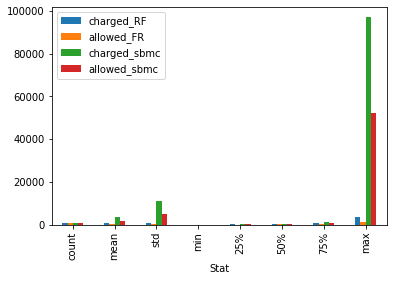

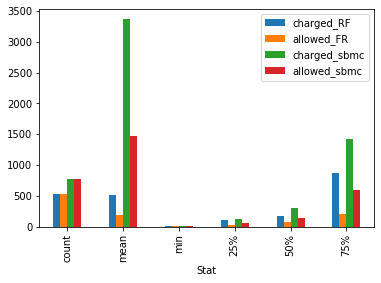

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
total_summary.plot(kind='bar')
total_summary2=total_summary.drop(total_summary.index[[2,7]])
total_summary2
total_summary2.plot(kind='bar')
# plot- what kinds of data would you want to explore

---

---

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [ ]:
assert False, "DO NOT REMOVE THIS LINE"

---

In [ ]:
%%bash
git pull
git add week13_assignment.ipynb
git commit -a -m "Submitting the week 13 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.